In [1]:
from sklearn.datasets import make_multilabel_classification
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import pickle as pkl
import numpy as np
import gc
from sklearn.cross_validation import cross_val_score
from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [21]:
dataWiki = pd.read_csv("data/dataframe_wiki", sep=" ", index_col="num_tokens")
dataJournal = pd.read_csv("data/dataframe_journal", sep=" ", index_col="num_tokens")

In [22]:
print dataWiki.shape
dataWiki.head()

(400, 157)


,freq_verb,freq_noun,freq_pron,freq_adj,freq_adv,freq_adp,freq_conj,freq_det,freq_num,freq_prt,...,._adj,._adv,._adp,._conj,._det,._num,._prt,._x,._.,class
num_tokens,,,,,,,,,,,,,,,,,,,,,
89,0.112360,0.337079,0.000000,0.000000,0.056180,0.179775,0.011236,0.168539,0.000000,0.0,...,0.0000,0.011364,0.034091,0.000000,0.022727,0.0,0.0,0.0,0.011364,1
161,0.130435,0.273292,0.006211,0.024845,0.037267,0.223602,0.012422,0.180124,0.018634,0.0,...,0.0125,0.000000,0.018750,0.006250,0.018750,0.0,0.0,0.0,0.000000,1
180,0.166667,0.266667,0.011111,0.000000,0.038889,0.250000,0.033333,0.138889,0.033333,0.0,...,0.0000,0.000000,0.011173,0.005587,0.022346,0.0,0.0,0.0,0.000000,1
51,0.215686,0.254902,0.000000,0.000000,0.000000,0.235294,0.000000,0.156863,0.000000,0.0,...,0.0000,0.000000,0.040000,0.000000,0.020000,0.0,0.0,0.0,0.020000,1
29,0.068966,0.275862,0.034483,0.068966,0.103448,0.172414,0.000000,0.172414,0.000000,0.0,...,0.0000,0.000000,0.000000,0.000000,0.035714,0.0,0.0,0.0,0.000000,1


In [23]:
print dataJournal.shape
dataJournal.head()

(999, 157)


,freq_verb,freq_noun,freq_pron,freq_adj,freq_adv,freq_adp,freq_conj,freq_det,freq_num,freq_prt,...,._adj,._adv,._adp,._conj,._det,._num,._prt,._x,._.,class
num_tokens,,,,,,,,,,,,,,,,,,,,,
3,0.000000,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0
21,0.095238,0.238095,0.190476,0.0,0.047619,0.095238,0.047619,0.095238,0.0,0.0,...,0.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0.05,0
6,0.166667,0.166667,0.333333,0.0,0.000000,0.000000,0.000000,0.166667,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0
7,0.000000,0.000000,0.428571,0.0,0.285714,0.142857,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0
14,0.142857,0.142857,0.071429,0.0,0.214286,0.214286,0.000000,0.142857,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0


In [28]:
df = pd.concat([dataJournal, dataWiki], axis=0)
df.fillna(0, inplace=True)

In [29]:
X = df.drop(["class"], axis=1)
Y = df["class"]

In [32]:
list_score = []
list_params = []

def score(params):
    print "Training with params : "
    print params

    clf = RandomForestClassifier(**params)
    score = cross_val_score(clf, X, Y, scoring="f1", cv=10)
    
    print "\tScore {0}\n\n".format(1 - score.mean())
    list_score.append(1 - score.mean())
    list_params.append(params)
    print "-------------------------------------------"
    
    gc.collect()
    
    return {'loss': 1 - score.mean(), 'status': STATUS_OK}

In [33]:
def optimize(trials):
    space = {
        'max_depth': hp.choice('max_depth', range(1,400)),
        'max_features': hp.choice('max_features', range(1,14)),
        'n_estimators': hp.choice('n_estimators', range(1,1000)),
        'n_jobs' : -1
    }
    
    best = fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=150)

    print best
    return best

trials = Trials()

param = optimize(trials)

Training with params : 
{'max_features': 3, 'n_estimators': 460, 'n_jobs': -1, 'max_depth': 335}
	Score 0.327909928983


-------------------------------------------
Training with params : 
{'max_features': 13, 'n_estimators': 768, 'n_jobs': -1, 'max_depth': 254}
	Score 0.303115773583


-------------------------------------------
Training with params : 
{'max_features': 3, 'n_estimators': 853, 'n_jobs': -1, 'max_depth': 38}
	Score 0.338493821705


-------------------------------------------
Training with params : 
{'max_features': 1, 'n_estimators': 299, 'n_jobs': -1, 'max_depth': 143}
	Score 0.339437345503


-------------------------------------------
Training with params : 
{'max_features': 8, 'n_estimators': 623, 'n_jobs': -1, 'max_depth': 347}
	Score 0.310736437912


-------------------------------------------
Training with params : 
{'max_features': 7, 'n_estimators': 16, 'n_jobs': -1, 'max_depth': 57}
	Score 0.354904007003


-------------------------------------------
Training wit

In [34]:
param = {'max_features': 12, 'n_estimators': 123, 'n_jobs': -1, 'max_depth': 302}
clf = RandomForestClassifier(**param)
clf.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=302, max_features=12, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=123, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
pkl.dump(clf, open("model.pkl", "wb"))

In [37]:
from matplotlib import pyplot as plt
%matplotlib inline

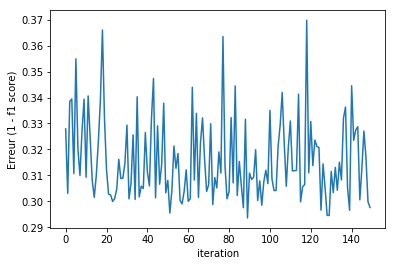

In [39]:
plt.plot(list_score)
plt.xlabel("iteration")
plt.ylabel('Erreur (1 - f1 score)')